## Lei (Raymond) Chi and Arav Sharma
## Question 2

Class 1 Mean Vector: [5.09166667 3.50833333 1.47916667 0.2625    ]
Class 1 Covariance Matrix:
 [[0.13992754 0.13963768 0.00764493 0.00967391]
 [0.13963768 0.2034058  0.00931159 0.01597826]
 [0.00764493 0.00931159 0.03911232 0.0061413 ]
 [0.00967391 0.01597826 0.0061413  0.01375   ]]
Class 2 Mean Vector: [5.92333333 2.73666667 4.23666667 1.30333333]
Class 2 Covariance Matrix:
 [[0.26047126 0.08014943 0.17152874 0.0444023 ]
 [0.08014943 0.08654023 0.06757471 0.02642529]
 [0.17152874 0.06757471 0.21067816 0.05918391]
 [0.0444023  0.02642529 0.05918391 0.03067816]]
Class 3 Mean Vector: [6.56666667 3.01904762 5.5047619  2.03333333]
Class 3 Covariance Matrix:
 [[0.27533333 0.09366667 0.19566667 0.00966667]
 [0.09366667 0.11761905 0.07390476 0.05883333]
 [0.19566667 0.07390476 0.19647619 0.01983333]
 [0.00966667 0.05883333 0.01983333 0.09533333]]
Accuracy: 98.67%


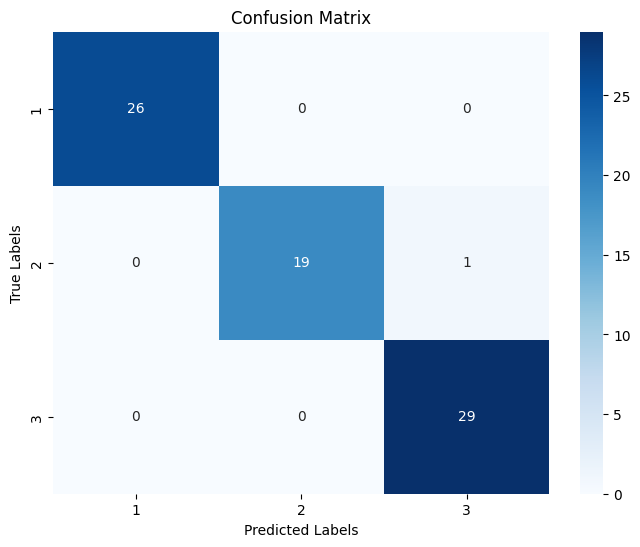

In [3]:
import numpy as np
import scipy.io
from collections import defaultdict
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = scipy.io.loadmat('./Iris.mat')

labels = data['labels']
features = data['features']

indices = np.arange(features.shape[0])
np.random.shuffle(indices)
features = features[indices]
labels = labels[indices]

split_point = len(features) // 2
train_features = features[:split_point]
train_labels = labels[:split_point]
test_features = features[split_point:]
test_labels = labels[split_point:]

means = {}
covariances = {}


features_by_class = defaultdict(list)


for feature, label in zip(train_features, train_labels):
    features_by_class[label.item()].append(feature)  

for label in features_by_class:
    features_by_class[label] = np.array(features_by_class[label])

for label, feats in features_by_class.items():
    means[label] = np.mean(feats, axis=0)
    covariances[label] = np.cov(feats, rowvar=False)

for label in sorted(means):
    print(f"Class {label} Mean Vector:", means[label])
    print(f"Class {label} Covariance Matrix:\n", covariances[label])

def classify_sample(feature, means, covariances):
    max_likelihood = -np.inf
    best_class = None

    for label in means:
        likelihood = multivariate_normal.pdf(feature, mean=means[label], cov=covariances[label])
        if likelihood > max_likelihood:
            max_likelihood = likelihood
            best_class = label

    return best_class

predicted_labels = np.array([classify_sample(feature, means, covariances) for feature in test_features])

accuracy = np.mean(predicted_labels == test_labels.flatten())
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(train_labels), yticklabels=np.unique(train_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

